# Update software
sudo apt-get update && sudo apt-get upgrade

# Verify JAVA version and path

In [2]:
!java -version

openjdk version "1.8.0_181"
OpenJDK Runtime Environment (build 1.8.0_181-8u181-b13-0ubuntu0.16.04.1-b13)
OpenJDK 64-Bit Server VM (build 25.181-b13, mixed mode)


In [3]:
!which java

/usr/bin/java


In [4]:
!whereis java

java: /usr/bin/java /usr/share/java /usr/share/man/man1/java.1.gz


In [5]:
!ls -l /usr/bin/java

lrwxrwxrwx 1 root root 22 May  6 13:30 /usr/bin/java -> /etc/alternatives/java


In [6]:
!ls -l /etc/alternatives/java

lrwxrwxrwx 1 root root 46 May  6 13:30 /etc/alternatives/java -> /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java


In [7]:
!readlink -f $(which java)

/usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java


# Download and unzip Elasticsearch (latest version - 6.4.0)
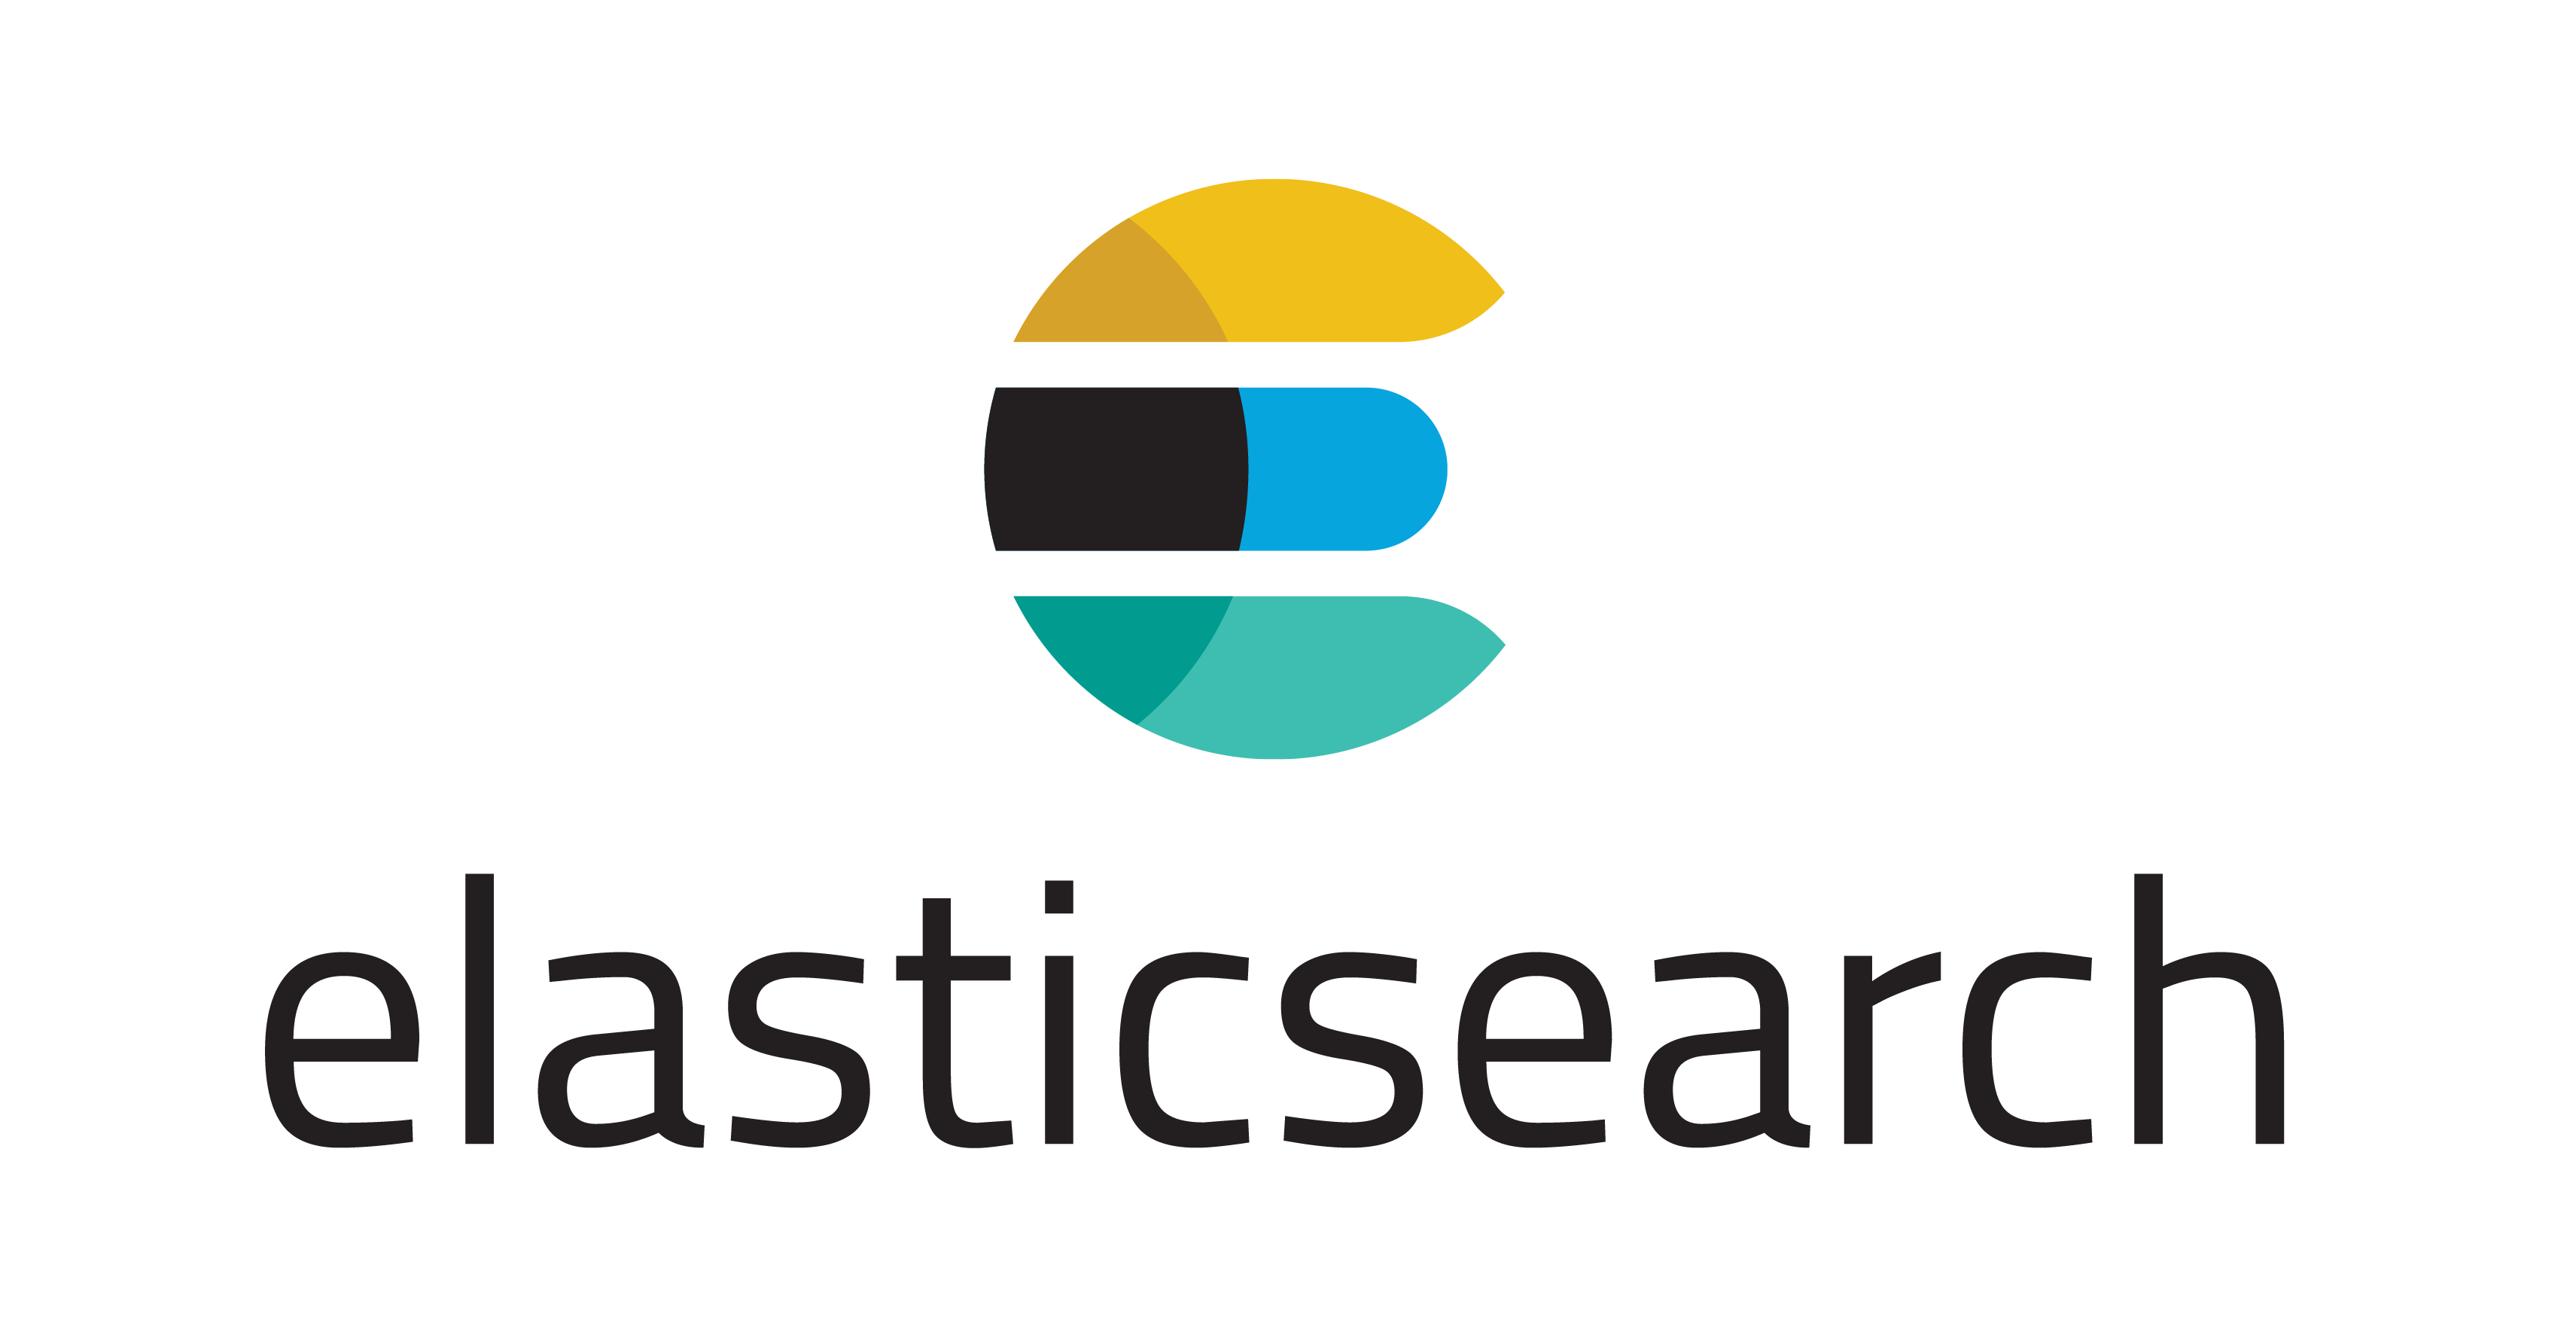
https://artifacts.elastic.co/downloads/elasticsearch/elasticsearch-6.4.0.tar.gz

# Install ElasticSearch (more info - https://www.elastic.co/downloads/elasticsearch)
/bin/elasticsearch

# Test ElasticSearch with browser
http://localhost:9200/

In [4]:
!curl -XGET http://127.0.0.1:9200

{
  "name" : "lrIoE1z",
  "cluster_name" : "elasticsearch",
  "cluster_uuid" : "wx1ep1OaSpK_1dOyb9rGrQ",
  "version" : {
    "number" : "6.4.0",
    "build_flavor" : "default",
    "build_type" : "tar",
    "build_hash" : "595516e",
    "build_date" : "2018-08-17T23:18:47.308994Z",
    "build_snapshot" : false,
    "lucene_version" : "7.4.0",
    "minimum_wire_compatibility_version" : "5.6.0",
    "minimum_index_compatibility_version" : "5.0.0"
  },
  "tagline" : "You Know, for Search"
}


In [ ]:
#This is not required if fscrawler is used

# Install ingest-attachment (more info - https://www.elastic.co/guide/en/elasticsearch/plugins/master/ingest-attachment.html)

#Note: Ingest Attachment converts binary documents like Powerpoints, Excel Spreadsheets, and PDF documents to text and metadata

#./bin/elasticsearch-plugin install ingest-attachment

#NOTE: Extracting contents from binary data is a resource intensive operation and consumes a lot of resources. It is highly recommended to run pipelines using this processor in a dedicated ingest node.

# Install python-client for ElasticSearch (more info - https://www.elastic.co/guide/en/elasticsearch/client/python-api/current/index.html)

Python Elasticsearch client documention - https://elasticsearch-py.readthedocs.io/en/master/


In [1]:
!pip install elasticsearch

    100% |████████████████████████████████| 122kB 3.0MB/s ta 0:00:01
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Test python-client for ElasticSearch


In [3]:
from datetime import datetime
from elasticsearch import Elasticsearch

In [4]:
# by default we connect to localhost:9200
es = Elasticsearch()

# datetimes will be serialized
es.index(index="my-index", doc_type="test-type", id=42, body={"any": "data", "timestamp": datetime.now()})
{u'_id': u'42', u'_index': u'my-index', u'_type': u'test-type', u'_version': 1, u'ok': True}

# but not deserialized
es.get(index="my-index", doc_type="test-type", id=42)['_source']

{'any': 'data', 'timestamp': '2018-09-12T14:55:24.014373'}

In [19]:
es = Elasticsearch()
es.index(index="test_crawler", doc_type="_doc", body={"data":"any"})

{'_index': 'test_crawler',
 '_type': '_doc',
 '_id': 'JEGqzWUBT8wfQ_ukOz5s',
 '_version': 1,
 'result': 'created',
 '_shards': {'total': 2, 'successful': 1, 'failed': 0},
 '_seq_no': 0,
 '_primary_term': 4}

# Download fscrawler and unzip fscrawler (latest stable verison - 2.5.0)
https://repo1.maven.org/maven2/fr/pilato/elasticsearch/crawler/fscrawler/2.5/

# fscrawler documention
https://fscrawler.readthedocs.io/en/fscrawler-2.5
NOTE: FS Crawler 2.5 is using Tika 1.18 and Elasticsearch Rest Client 6.3.2.

# Configure JAVA_HOME to point to your Java installation directory
NOTE: https://askubuntu.com/questions/175514/how-to-set-java-home-for-java

sudo -s

nano /etc/environment

JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java"

source /etc/environment

echo $JAVA_HOME

# Start fscrawler
bin/fscrawler <job_name>

# Create test directory with some files
mkdir /tmp/es

# Configure fscrawler _setting.json file
nano /path/to/.fscrawler/<job_name>/_settings.json

In [ ]:
{
  "name" : "<job_name>",
  "fs" : {
    "url" : "<path/to/your/directory>",
    "update_rate" : "1m",
    "includes" : [ ".pdf", ".doc", ".ods", ".txt" ],
    "excludes" : [ "*/~*" ],
    "json_support" : false,
    "filename_as_id" : true,
    "add_filesize" : true,
    "remove_deleted" : true,
    "add_as_inner_object" : false,
    "store_source" : true,
    "index_content" : true,
    "indexed_chars" : "100%",
    "attributes_support" : false,
    "raw_metadata" : true,
    "xml_support" : false,
    "index_folders" : true,
    "lang_detect" : false,
    "continue_on_error" : false,
    "pdf_ocr" : true,
    "ocr" : {
      "language" : "eng"
    }
  },
  "elasticsearch" : {
    "index" : "docs",
    "index_folder" : "folders",
    "nodes" : [ {
      "host" : "127.0.0.1",
      "port" : 9200,
      "scheme" : "HTTP"
    } ],
    "bulk_size" : 100,
    "flush_interval" : "5s",
    "byte_size" : "10mb"
  },
  "rest" : {
    "scheme" : "HTTP",
    "host" : "127.0.0.1",
    "port" : 8080,
    "endpoint" : "fscrawler"
  }
}


In [ ]:
{
  "name" : "new_job",
  "fs" : {
    "url" : "/tmp/es",
    "update_rate" : "1m",
    "includes" : [ ".pdf", ".doc", ".ods", ".txt" ],
    "excludes" : [ "*/~*" ],
    "json_support" : true,
    "filename_as_id" : true,
    "add_filesize" : true,
    "remove_deleted" : true,
    "add_as_inner_object" : false,
    "store_source" : true,
    "index_content" : true,
    "indexed_chars" : "100%",
    "attributes_support" : false,
    "raw_metadata" : true,
    "xml_support" : false,
    "index_folders" : true,
    "lang_detect" : false,
    "continue_on_error" : false,
    "pdf_ocr" : true,
    "ocr" : {
      "language" : "eng"
    }
  },
  "elasticsearch" : {
    "nodes" : [ {
      "host" : "127.0.0.1",
      "port" : 9200,
      "scheme" : "HTTP"
    } ],
    "bulk_size" : 100,
    "flush_interval" : "5s",
    "byte_size" : "10mb"
  },
  "rest" : {
    "scheme" : "HTTP",
    "host" : "127.0.0.1",
    "port" : 8080,
    "endpoint" : "fscrawler"
  }
}


# Start fscawler job

path/to/fscrawler_directory>//bin/fscrawler <job_name>

# Restart fscrawler job (if necessary)

<path/to/fscrawler_directory>/bin/fscrawler <job_name> --loop 1 --restart #loop is optional

# Check ElasticSearch 

file:///home/mix/Pictures/Screenshot%20from%202018-09-13%2013-40-49.png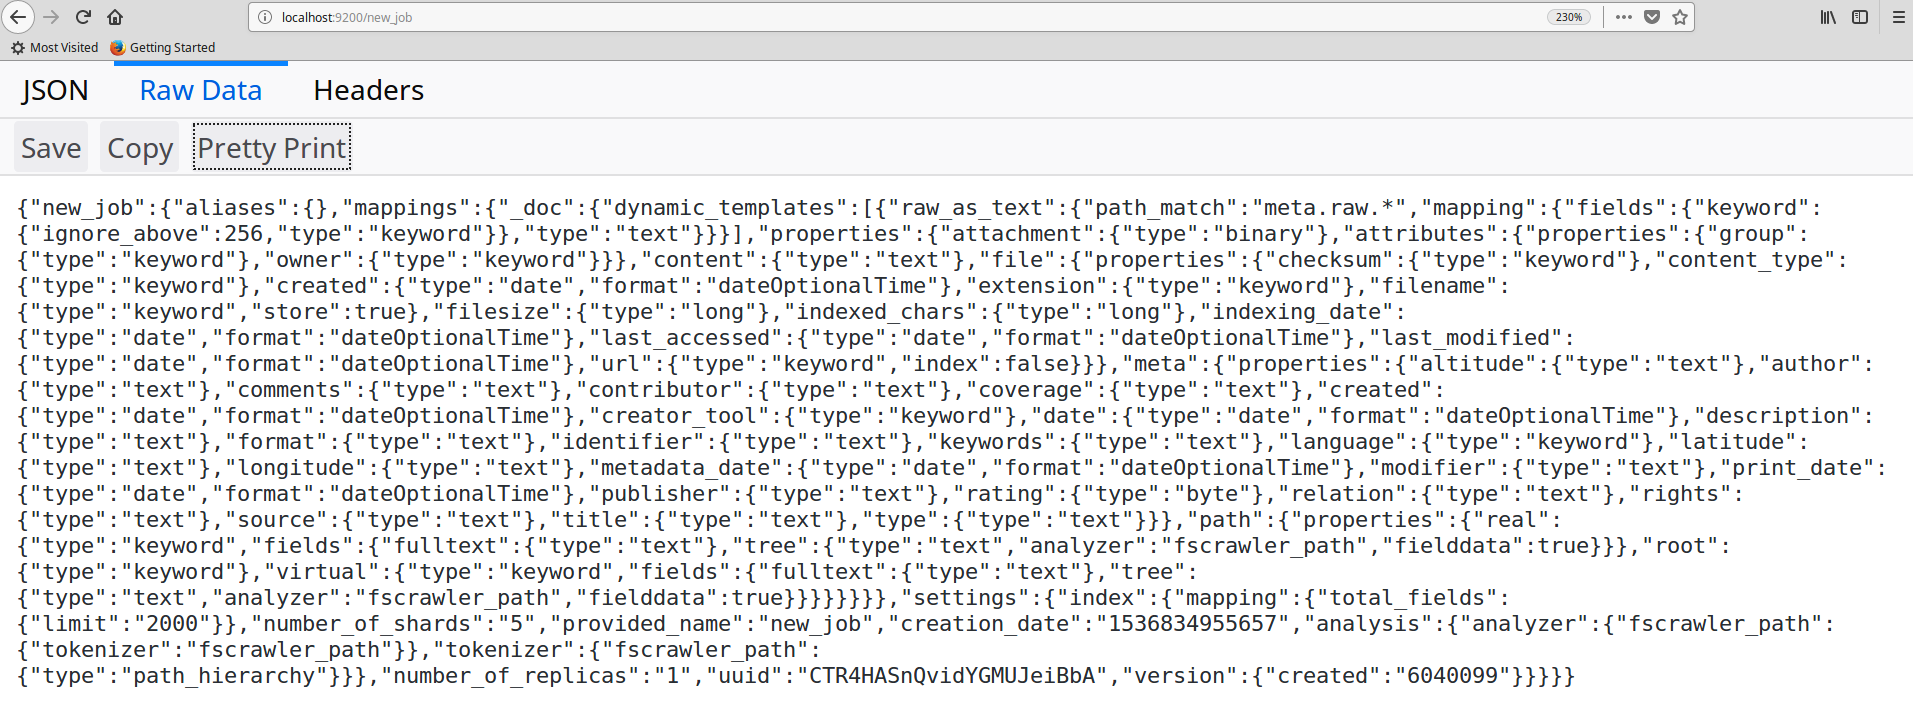


# Download and unzip Kibana (latest version - 6.4.0)
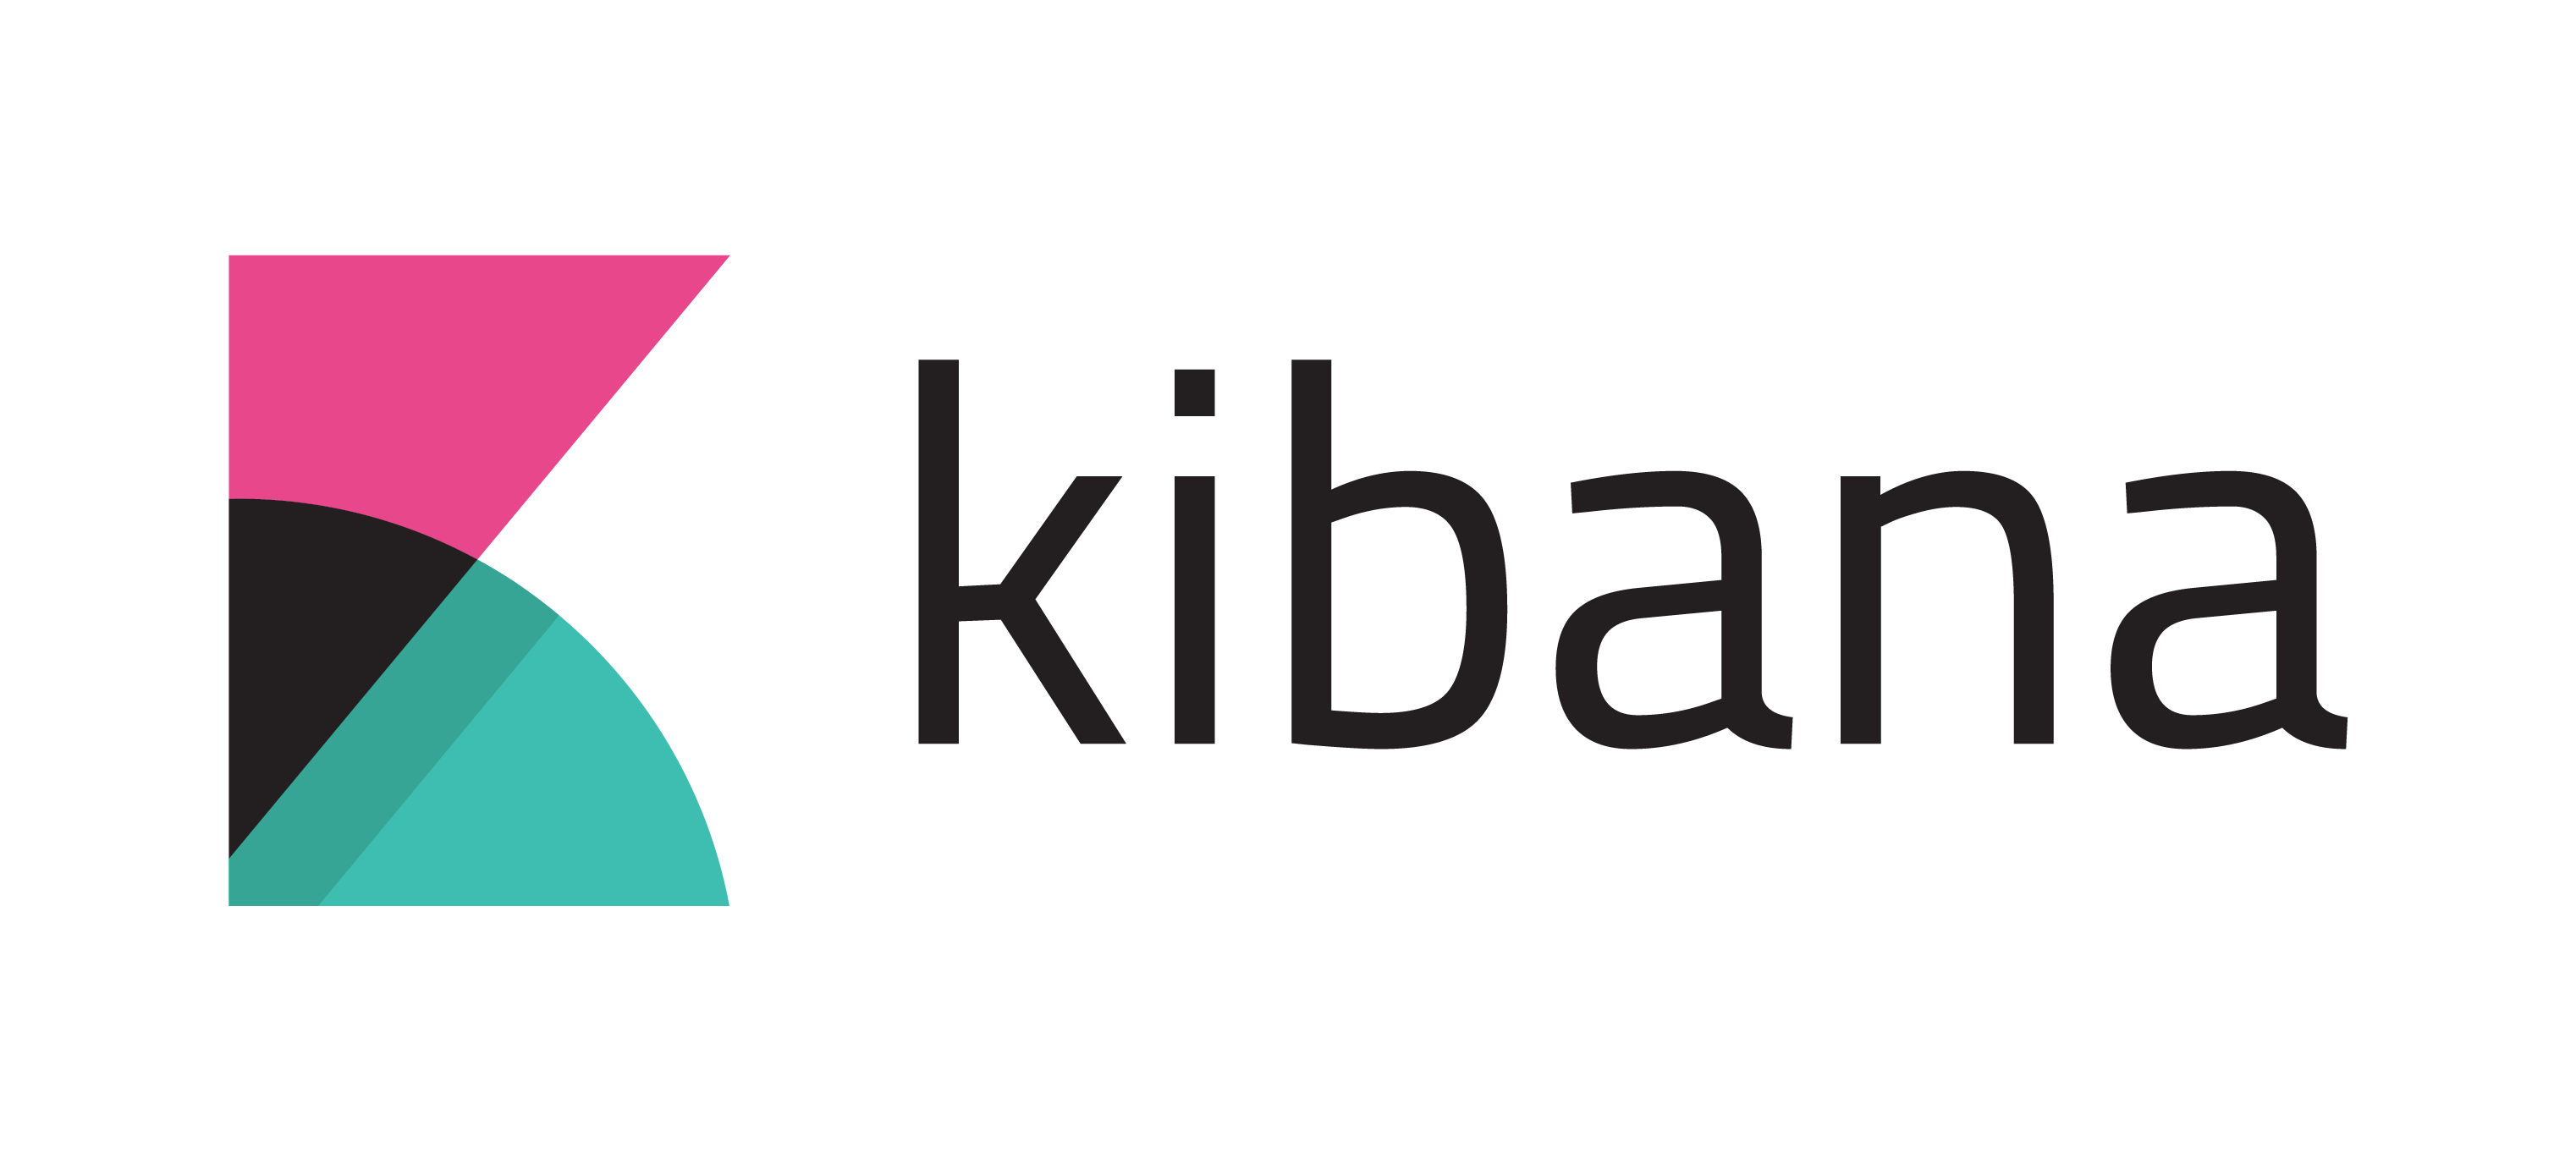
https://artifacts.elastic.co/downloads/kibana/kibana-6.4.0-linux-x86_64.tar.gz

# Install Kibana (more info - https://www.elastic.co/downloads/kibana)
sudo nano /config/kibana.yml

elasticsearch.url: "http://localhost:9200"

/bin/kibana

# Test Kibana with browser
http://localhost:5601

# Check Kibana dashboard

file:///home/mix/Pictures/Screenshot%20from%202018-09-13%2013-45-17.png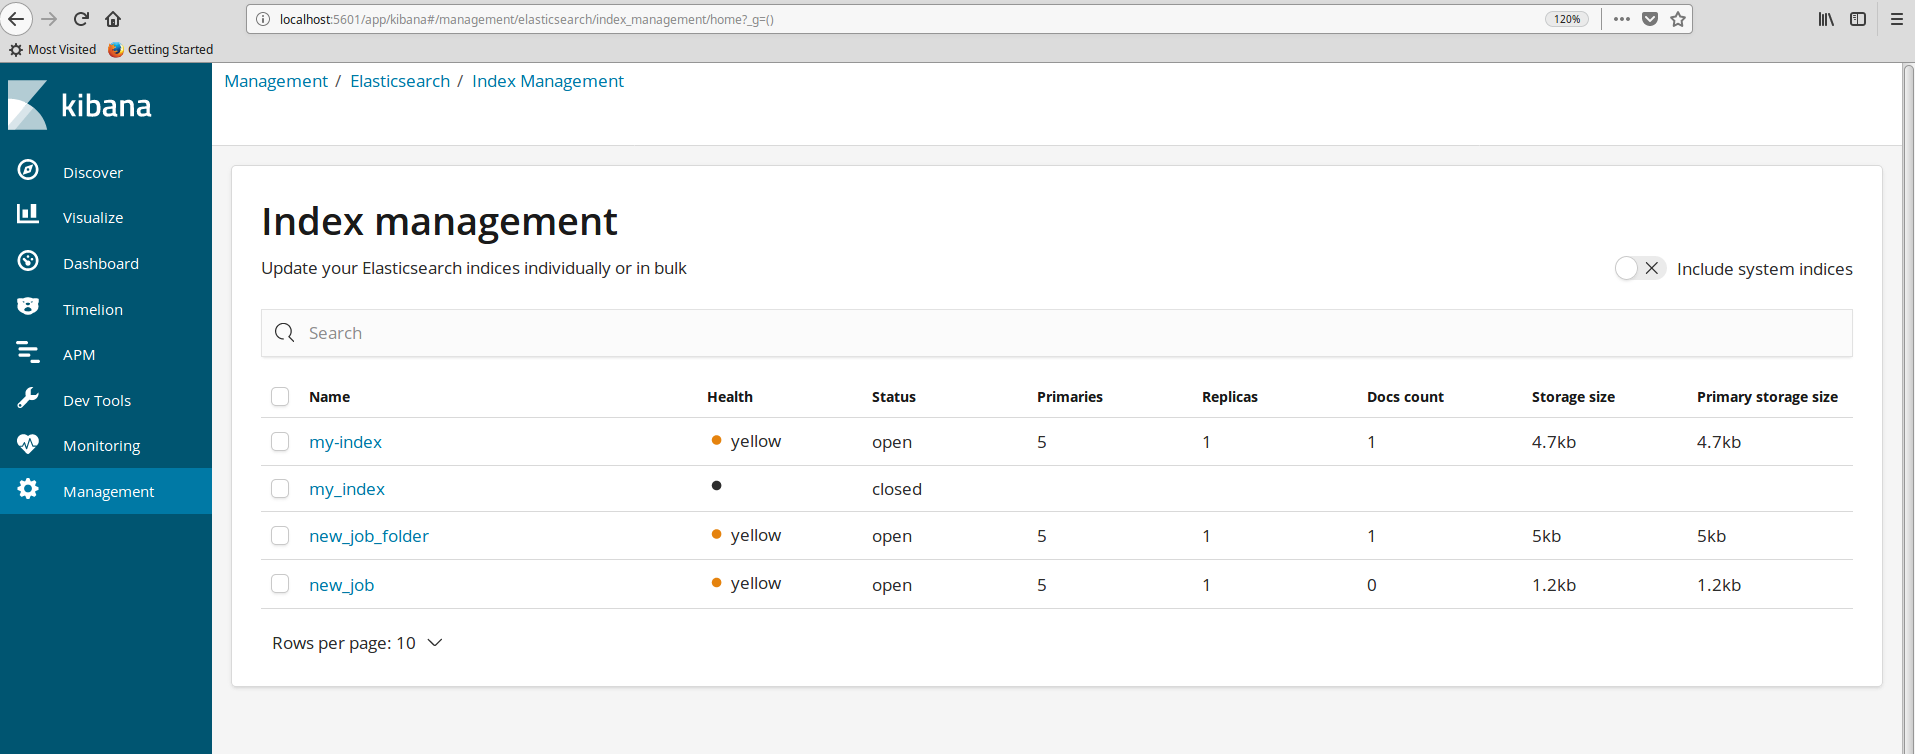



file:///home/mix/Pictures/Screenshot%20from%202018-09-13%2014-47-11.png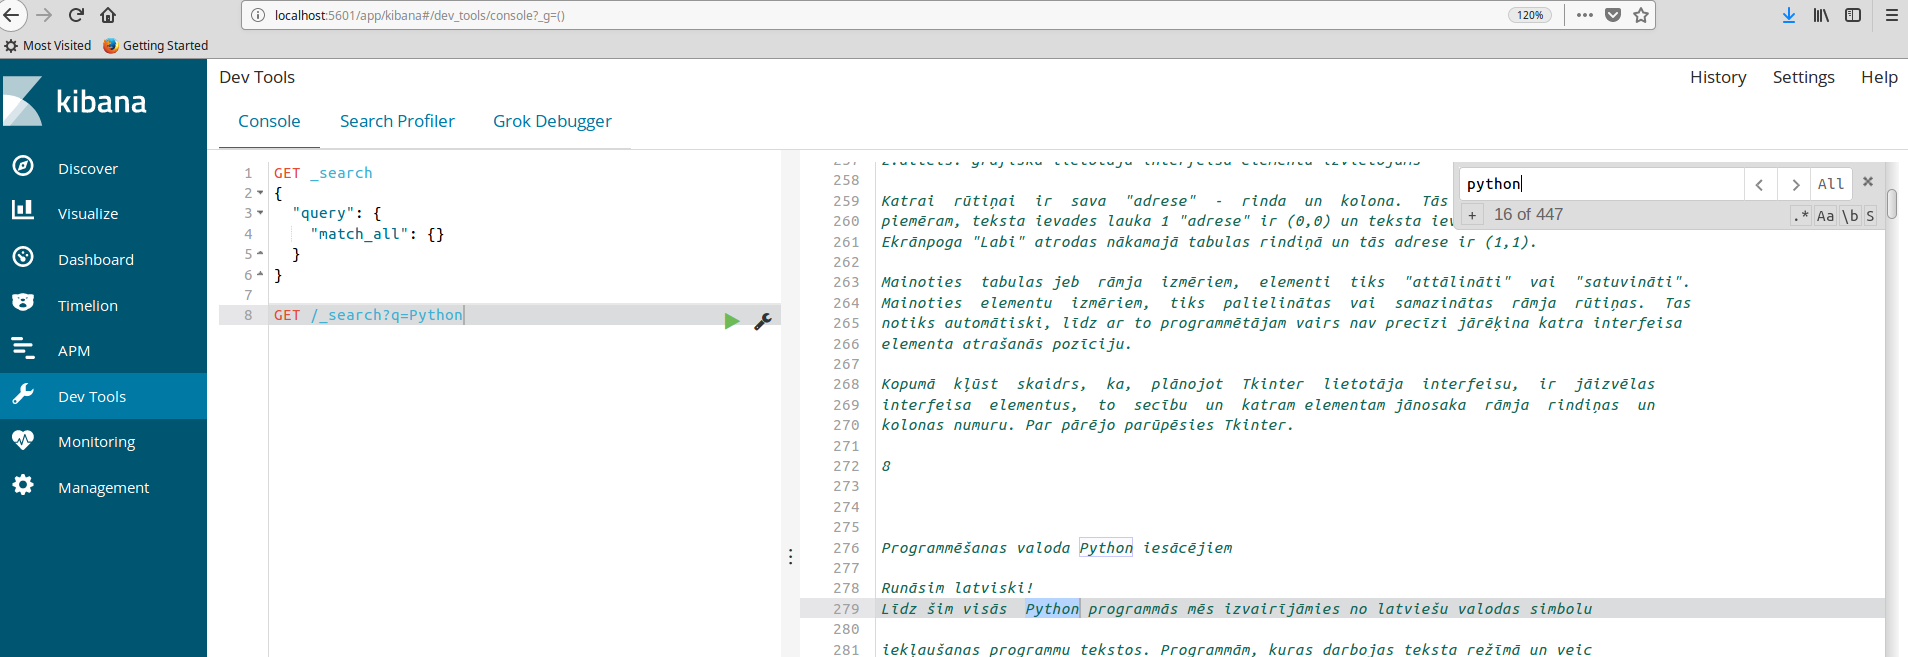
NOTE: http://elasticsearch-cheatsheet.jolicode.com/

# With ElasticSearch recursively index a directory

# Create a list of common words with ElasticSearch

# From common words manually create a search pattern

# Create script that sends alert if a new documents matches the pattern